# Énoncé du problème

L'accès à une eau potable propre est essentiel pour maintenir une bonne santé, car il s'agit non seulement d'un droit humain fondamental, mais également d'un élément crucial des politiques efficaces de protection de la santé. Garantir l'accès à une eau potable sûre est une préoccupation majeure à différents niveaux, notamment national, régional et local. Des recherches ont démontré que l'investissement dans l'approvisionnement en eau et l'assainissement peut avoir un impact économique positif dans certaines régions. Cela s'explique par le fait que les avantages liés à la réduction des problèmes de santé et des dépenses de soins de santé l'emportent sur les coûts associés à la mise en œuvre de telles interventions.

![](https://media.istockphoto.com/id/1365292128/photo/woman-pouring-water-into-glass-in-kitchen-closeup.jpg?s=612x612&w=0&k=20&c=nYuDsqwKHdNjc1X1VkU41dbiF4_WYsqPbBVhNFhoO8g=)

#### Task 1

• Prédire si l'eau est sûre pour la consommation humaine ou non.

1. pH : pH de l'eau (0 à 14).
2. Dureté : Capacité de l'eau à précipiter le savon en mg/L.
3. Solides : Total des solides dissous en ppm.
4. Chloramines : Quantité de chloramines en ppm.
5. Sulfate : Quantité de sulfates dissous en mg/L.
6. Conductivité : Conductivité électrique de l'eau en μS/cm.
7. Carbone_organique : Quantité de carbone organique en ppm.
8. Trihalométhanes : Quantité de trihalométhanes en μg/L.
9. Turbidité : Mesure de la propriété émissive de la lumière de l'eau en NTU.
10. Potabilité : Indique si l'eau est propre à la consommation humaine. Potable - 1 et Non potable - 0.

## Data Loading & Preprocessing

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [58]:
# For the same dataset, instead of splitting it, I will read it twice as two different variables, df1 and df2.

In [59]:
df1 = pd.read_csv('SD_water_potability.csv')
df2 = pd.read_csv('SD_water_potability.csv')

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2785 non-null   float64
 1   Dureté             3276 non-null   float64
 2   Solides            3276 non-null   float64
 3   Chloramines        3276 non-null   float64
 4   Sulfate            2495 non-null   float64
 5   Conductivité       3276 non-null   float64
 6   Carbone_organique  3276 non-null   float64
 7   Trihalométhanes    3114 non-null   float64
 8   Turbidité          3276 non-null   float64
 9   Potabilité         3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2785 non-null   float64
 1   Dure

## Data Visualization

 let's visualize the data. Visualization provides a powerful means to represent information in a visual format, making it easier to interpret patterns, trends, and relationships within the data.

<AxesSubplot:>

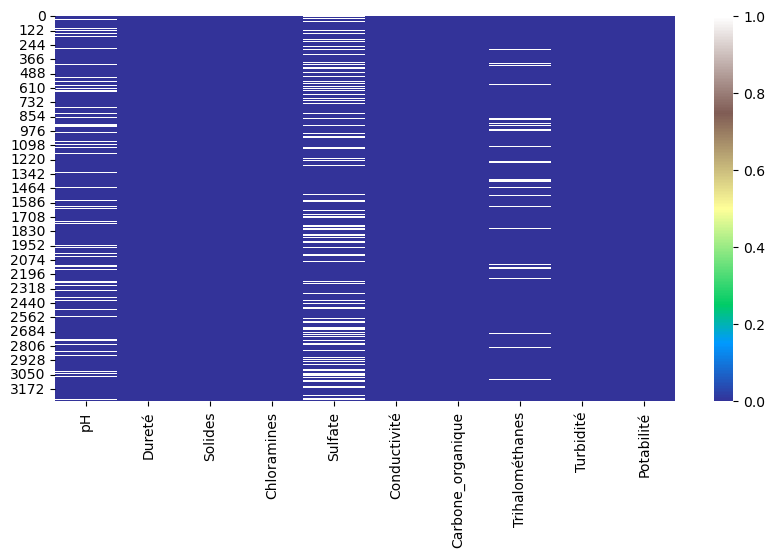

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.isnull(), cmap='terrain')

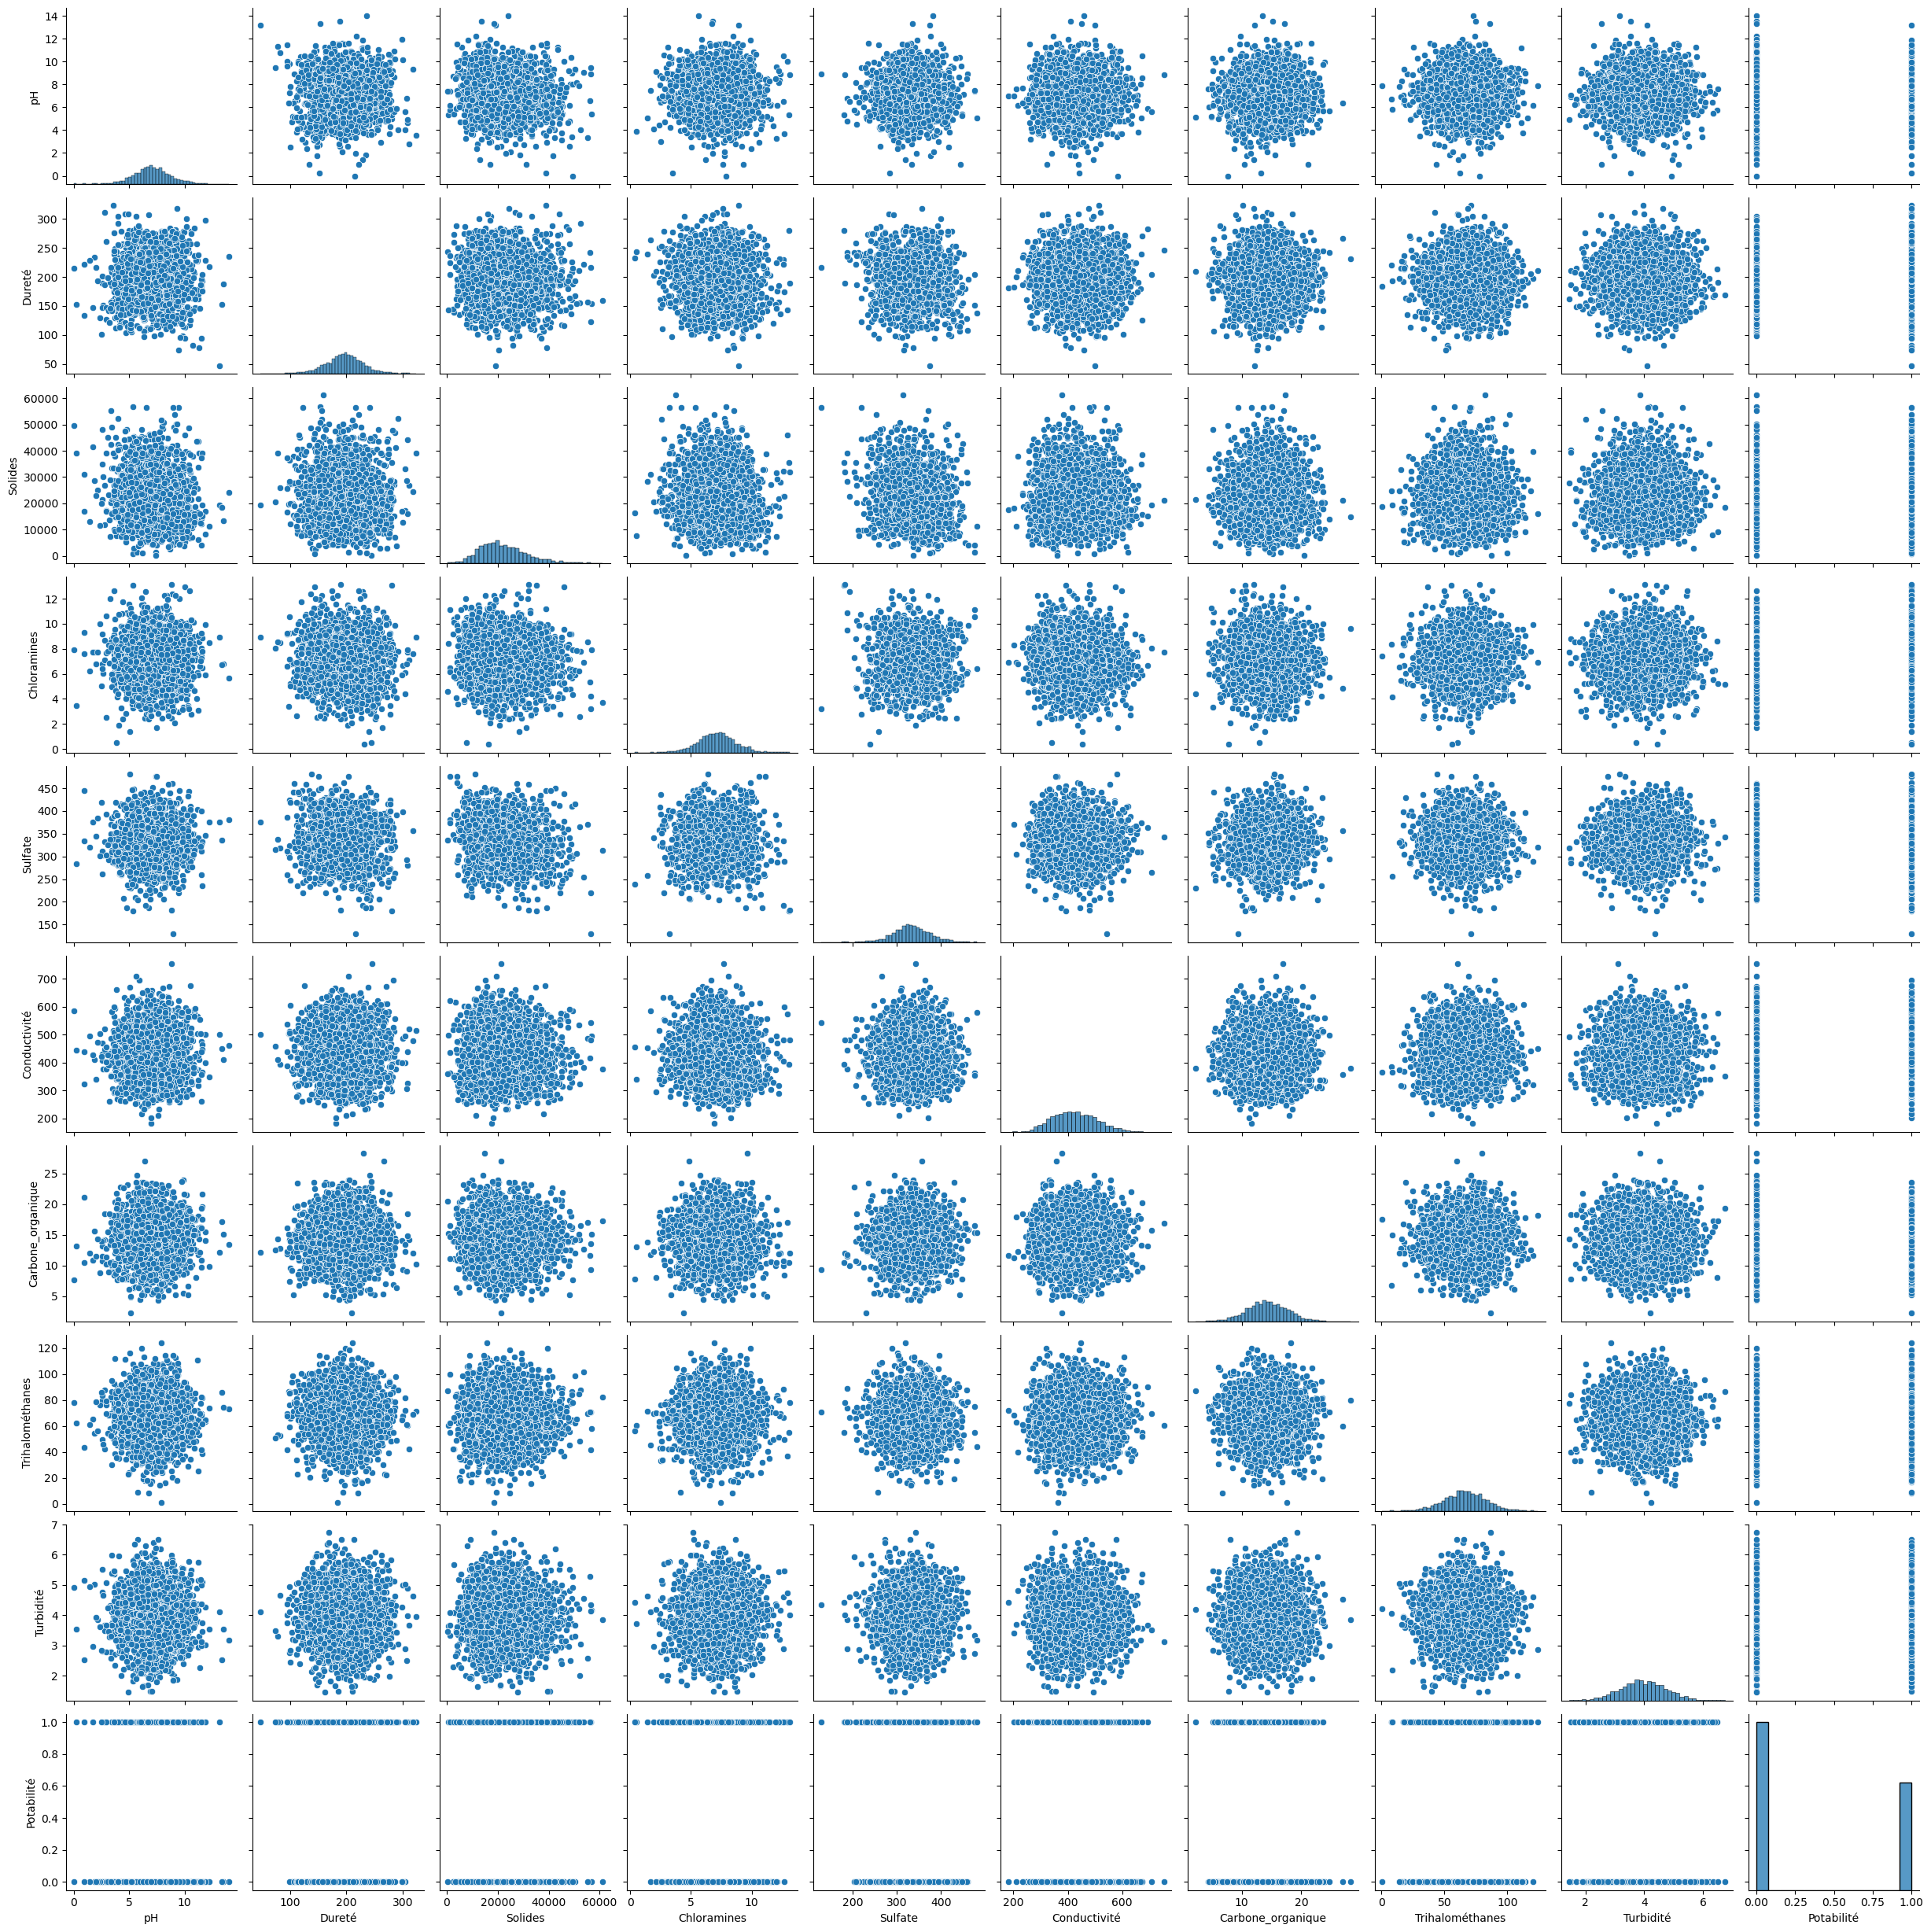

In [61]:
sns.pairplot(df1)
plt.show()

In [62]:
fig = px.pie(df1, names='Potabilité', hole=0.4)
fig.show()

In [63]:
fig = px.scatter(df1, x='pH', y='Sulfate', color='Potabilité')
fig.show()

In [64]:
fig1 = px.scatter(df1, x='Carbone_organique', y='Dureté', color='Potabilité')
fig1.show()

## Filling Null Values

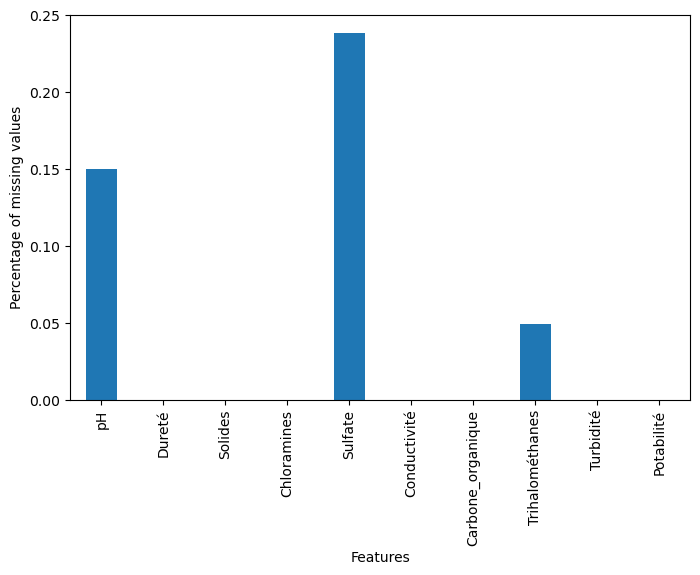

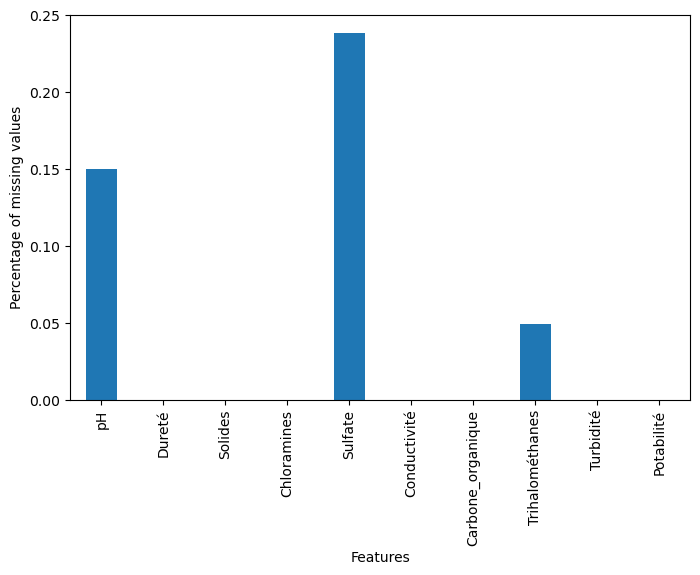

In [65]:
df1.isnull().mean().plot.bar(figsize=(8,5))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show()
df2.isnull().mean().plot.bar(figsize=(8,5))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show()

In [66]:
#fill the mean for this particular feature

In [67]:
df1['Trihalométhanes'] = df1['Trihalométhanes'].fillna(df1['Trihalométhanes'].mean())
df2['Trihalométhanes'] = df2['Trihalométhanes'].fillna(df2['Trihalométhanes'].mean())

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2785 non-null   float64
 1   Dureté             3276 non-null   float64
 2   Solides            3276 non-null   float64
 3   Chloramines        3276 non-null   float64
 4   Sulfate            2495 non-null   float64
 5   Conductivité       3276 non-null   float64
 6   Carbone_organique  3276 non-null   float64
 7   Trihalométhanes    3276 non-null   float64
 8   Turbidité          3276 non-null   float64
 9   Potabilité         3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2785 non-null   float64
 1   Dure

In [68]:
#this 2 features have quite significant amount of missing value wich is not an ideal way to actually fill with 
#mean value instead we just kind of drop the rows that this particular 2 feature

In [69]:
df1 = df1.dropna(subset=['pH', 'Sulfate'])
df2 = df2.dropna(subset=['pH', 'Sulfate'])

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2116 non-null   float64
 1   Dureté             2116 non-null   float64
 2   Solides            2116 non-null   float64
 3   Chloramines        2116 non-null   float64
 4   Sulfate            2116 non-null   float64
 5   Conductivité       2116 non-null   float64
 6   Carbone_organique  2116 non-null   float64
 7   Trihalométhanes    2116 non-null   float64
 8   Turbidité          2116 non-null   float64
 9   Potabilité         2116 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 181.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2116 non-null   float64
 1   Dure

In [70]:
print(df1['Potabilité'].value_counts())

0    1269
1     847
Name: Potabilité, dtype: int64


In [71]:
#we hve Balance class here 

In [72]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [73]:
from imblearn.over_sampling import SMOTE

X1 = df1.loc[:, df1.columns != 'Potabilité']
Y1 = df1.Potabilité
X2 = df2.loc[:, df2.columns != 'Potabilité']
Y2 = df2.Potabilité

smote = SMOTE(k_neighbors=3, random_state=1234)
resam_X1,resam_Y1 = smote.fit_resample(X1, Y1)
resam_X2,resam_Y2 = smote.fit_resample(X2, Y2)

df1 = pd.concat([pd.DataFrame(resam_X1), pd.DataFrame(resam_Y1)], axis=1)
df2 = pd.concat([pd.DataFrame(resam_X2), pd.DataFrame(resam_Y2)], axis=1)

print(df1['Potabilité'].value_counts())
print(df2['Potabilité'].value_counts())

0    1269
1    1269
Name: Potabilité, dtype: int64
0    1269
1    1269
Name: Potabilité, dtype: int64


In [74]:
#Now our class distribution are balanced

In [75]:
# pH
# value < 6.5 is acidic
# value >= 6.5 and value <= 8.5 is neutral
# value > 8.5 is alkaline

print(df1['pH'].describe())

df1['pH'] = np.where((df1.pH < 6.5), 0.0, df1.pH)
df1['pH'] = np.where((df1.pH >= 6.5) & (df1.pH <= 8.5), 1.0, df1.pH)
df1['pH'] = np.where((df1.pH > 8.5), 2.0, df1.pH)

print(df1['pH'].describe())

count    2538.000000
mean        7.107611
std         1.537785
min         0.227499
25%         6.153401
50%         7.059403
75%         8.027921
max        14.000000
Name: pH, dtype: float64
count    2538.000000
mean        0.843972
std         0.693518
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: pH, dtype: float64


In [76]:
# Dureté             
# value <= 60 is soft (0)
# value 61- 120 is moderate (1)
# value 121 - 180 is hard (2)
# value value >= 181 is very hard (3)

df1['Dureté'] = np.where((df1.Dureté <= 60), 0.0, df1.Dureté)
df1['Dureté'] = np.where((df1.Dureté > 60) & (df1.Dureté <= 120), 1.0, df1.Dureté)
df1['Dureté'] = np.where((df1.Dureté > 120) & (df1.Dureté <= 180), 2.0, df1.Dureté)
df1['Dureté'] = np.where((df1.Dureté > 180), 3.0, df1.Dureté)



print(df1['Dureté'].describe())


count    2538.000000
mean        2.700158
std         0.494678
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Dureté, dtype: float64


In [77]:
print(df1['Solides'].describe())

count     2538.000000
mean     22050.223266
std       8687.577565
min        320.942611
25%      15740.895528
50%      20977.964208
75%      27378.419624
max      56488.672413
Name: Solides, dtype: float64


In [78]:
# Chloramines
# value <= 4.0 is safe (0)
# value > 4.0  is unsafe (1)

df1['Chloramines'] = np.where((df1.Chloramines <= 4.0), 0.0, df1.Chloramines)
df1['Chloramines'] = np.where((df1.Chloramines > 4.0), 1.0, df1.Chloramines)
print(df1['Chloramines'].describe())



count    2538.000000
mean        0.973207
std         0.161509
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Chloramines, dtype: float64


In [79]:
# Sulfate
print(df1['Sulfate'].describe())

count    2538.000000
mean      333.143793
std        40.710937
min       129.000000
25%       307.674220
50%       332.751774
75%       359.031416
max       481.030642
Name: Sulfate, dtype: float64


In [80]:
# Conductivité
# value <= 400 is safe (0)
# value > 400 is unsafe (1)


df1['Conductivité'] = np.where((df1.Conductivité <= 400), 0.0, df1.Conductivité)
df1['Conductivité'] = np.where((df1.Conductivité > 400), 1.0, df1.Conductivité)

print(df1['Conductivité'].describe())

count    2538.000000
mean        0.606383
std         0.488648
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Conductivité, dtype: float64


In [81]:
# Carbone_organique
# value <= 5.0 is safe (0)
# value > 5.0 is unsafe (1)

df1['Carbone_organique'] = np.where((df1.Carbone_organique <= 5.0), 0.0, df1.Carbone_organique)
df1['Carbone_organique'] = np.where((df1.Carbone_organique > 5.0), 1.0, df1.Carbone_organique)

print(df1['Carbone_organique'].describe())



count    2538.00000
mean        0.99803
std         0.04435
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: Carbone_organique, dtype: float64


In [82]:
# Trihalométhanes 
# value <= 80 is safe (0)
# value > 80 is unsafe (1)

df1['Trihalométhanes'] = np.where((df1.Trihalométhanes <= 80), 0.0, df1.Trihalométhanes)
df1['Trihalométhanes'] = np.where((df1.Trihalométhanes > 80), 1.0, df1.Trihalométhanes)

print(df1['Trihalométhanes'].describe())



count    2538.000000
mean        0.173759
std         0.378977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Trihalométhanes, dtype: float64


In [83]:
# Turbidité  
# value <= 5.0 is safe (0)
# value > 5.0 is unsafe (1)

df1['Turbidité'] = np.where((df1.Turbidité  <= 5.0), 0.0, df1.Turbidité )
df1['Turbidité'] = np.where((df1.Turbidité  > 5.0), 1.0, df1.Turbidité )

print(df1['Turbidité'].describe())



count    2538.000000
mean        0.088652
std         0.284297
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Turbidité, dtype: float64


In [84]:
def normalize_df(df):
    out = df.copy()
    for features in df.columns:
        if features != 'Potabilité':
            max_value = df[features].max()
            min_value = df[features].min()
            print("features {}, max value {}, min value {}".format(features, max_value, min_value))
            out[features] = (df[features] - min_value) / (max_value - min_value)
            
    return out

df1 = normalize_df(df1)
df2 = normalize_df(df2)

print("|------------------------------------------|")
print(df1.head(5))
print("|------------------------------------------|")
print(df2.head(5))
print("|------------------------------------------|")

features pH, max value 2.0, min value 0.0
features Dureté, max value 3.0, min value 0.0
features Solides, max value 56488.67241273919, min value 320.942611274359
features Chloramines, max value 1.0, min value 0.0
features Sulfate, max value 481.0306423059972, min value 129.00000000000003
features Conductivité, max value 1.0, min value 0.0
features Carbone_organique, max value 1.0, min value 0.0
features Trihalométhanes, max value 1.0, min value 0.0
features Turbidité, max value 1.0, min value 0.0
features pH, max value 13.999999999999998, min value 0.2274990502021987
features Dureté, max value 317.33812405558257, min value 47.432
features Solides, max value 56488.67241273919, min value 320.942611274359
features Chloramines, max value 13.127000000000002, min value 1.3908709048851806
features Sulfate, max value 481.0306423059972, min value 129.00000000000003
features Conductivité, max value 753.3426195583046, min value 201.6197367551575
features Carbone_organique, max value 27.0067066111

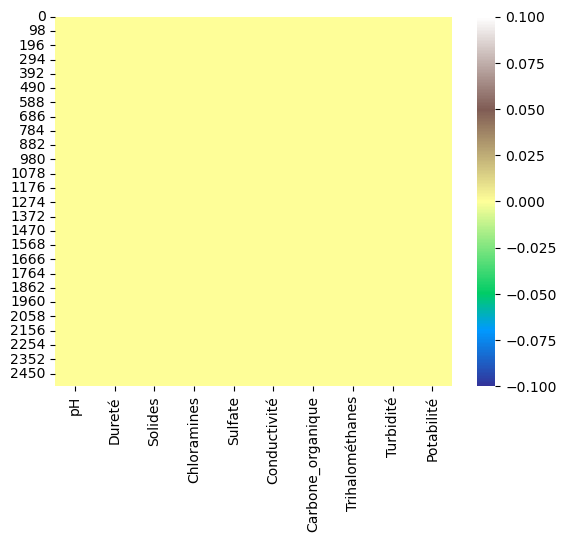

In [85]:
sns.heatmap(df1.isnull(),cmap='terrain')
plt.show()

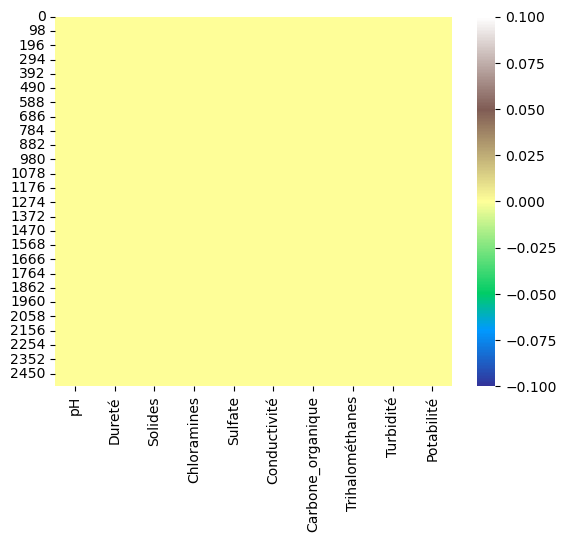

In [86]:
sns.heatmap(df2.isnull(),cmap='terrain')
plt.show()

In [87]:
fig = px.pie(df1, names='Potabilité', hole=0.4)
fig.update_layout(title_text='Pie Chart: Potabilité_categorized Data')
fig.show()

In [88]:
colors = ['#FFA500','#0000FF']
fig = px.pie(df2, names='Potabilité', hole=0.4, color_discrete_sequence=colors)
fig.update_layout(title_text='Pie Chart: Potabilité_normalized Data')
fig.show()

In [89]:
df1.to_csv('water_quality_categorized.csv', index=False)
df2.to_csv('water_quality_normalized.csv', index=False)

## Model Training

In [90]:
df1 = pd.read_csv('water_quality_categorized.csv')
df2 = pd.read_csv('water_quality_normalized.csv')

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2538 non-null   float64
 1   Dureté             2538 non-null   float64
 2   Solides            2538 non-null   float64
 3   Chloramines        2538 non-null   float64
 4   Sulfate            2538 non-null   float64
 5   Conductivité       2538 non-null   float64
 6   Carbone_organique  2538 non-null   float64
 7   Trihalométhanes    2538 non-null   float64
 8   Turbidité          2538 non-null   float64
 9   Potabilité         2538 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 198.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pH                 2538 non-null   float64
 1   Dure

In [91]:
df1_features = df1.loc[:, df1.columns != 'Potabilité']
df1_label = df1.Potabilité

df2_features = df2.loc[:, df2.columns != 'Potabilité']
df2_label = df2.Potabilité

In [92]:
from sklearn.model_selection import train_test_split

df1_train_X, df1_test_X, df1_train_Y, df1_test_Y = train_test_split(df1_features, df1_label, test_size=0.2, random_state=1234)
df2_train_X, df2_test_X, df2_train_Y, df2_test_Y = train_test_split(df2_features, df2_label, test_size=0.2, random_state=1234)

### Decision Tree Classifier ML

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DCT_1 = DecisionTreeClassifier() # categorized
DCT_1.fit(df1_train_X, df1_train_Y)

DCT_2 = DecisionTreeClassifier() # uncategorized
DCT_2.fit(df2_train_X, df2_train_Y)

DCT1_results = DCT_1.predict(df1_test_X)
DCT2_results = DCT_2.predict(df2_test_X)

cfm_1 = metrics.confusion_matrix(df1_test_Y, DCT1_results)
cfm_2 = metrics.confusion_matrix(df2_test_Y, DCT2_results)

accuracy_1 = metrics.accuracy_score(df1_test_Y, DCT1_results)
accuracy_2 = metrics.accuracy_score(df2_test_Y, DCT2_results)

precision_1 = metrics.precision_score(df1_test_Y, DCT1_results)
precision_2  = metrics.precision_score(df1_test_Y, DCT1_results)

recall_1 = metrics.recall_score(df1_test_Y, DCT1_results)
recall_2 = metrics.recall_score(df1_test_Y, DCT1_results)

print("Confusion matrix for categorized: {}".format(cfm_1))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy_1, precision_1, recall_1))
print()
print("Confusion matrix for uncategorized: {}".format(cfm_2))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy_2, precision_2, recall_2))

Confusion matrix for categorized: [[162 104]
 [ 89 153]]
Accuracy : 0.6200787401574803, precision : 0.5953307392996109, recall : 0.6322314049586777

Confusion matrix for uncategorized: [[165 101]
 [ 92 150]]
Accuracy : 0.6200787401574803, precision : 0.5953307392996109, recall : 0.6322314049586777


### Random Forest Classifier ML

In [101]:
from sklearn.ensemble import RandomForestClassifier

RFC_1 = RandomForestClassifier() # categorized
RFC_1.fit(df1_train_X, df1_train_Y)

RFC_2 = RandomForestClassifier() # uncategorized
RFC_2.fit(df2_train_X, df2_train_Y)

RFC1_results = RFC_1.predict(df1_test_X)
RFC2_results = RFC_2.predict(df2_test_X)

cfm_1_RFC = metrics.confusion_matrix(df1_test_Y, RFC1_results)
cfm_2_RFC = metrics.confusion_matrix(df2_test_Y, RFC2_results)

accuracy1_RFC = metrics.accuracy_score(df1_test_Y, RFC1_results)
accuracy2_RFC = metrics.accuracy_score(df2_test_Y, RFC2_results)

precision1_RFC = metrics.precision_score(df1_test_Y, RFC1_results)
precision2_RFC = metrics.precision_score(df2_test_Y, RFC2_results)

recall1_RFC = metrics.recall_score(df1_test_Y, RFC1_results)
recall2_RFC = metrics.recall_score(df2_test_Y, RFC2_results)

print("Confusion matrix for categorized: {}".format(cfm_1_RFC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy1_RFC, precision1_RFC, recall1_RFC))
print()
print("Confusion matrix for uncategorized: {}".format(cfm_2_RFC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy2_RFC, precision2_RFC, recall2_RFC))

Confusion matrix for categorized: [[175  91]
 [ 79 163]]
Accuracy : 0.6653543307086615, precision : 0.6417322834645669, recall : 0.6735537190082644

Confusion matrix for uncategorized: [[184  82]
 [ 66 176]]
Accuracy : 0.7086614173228346, precision : 0.6821705426356589, recall : 0.7272727272727273


### Gradient Boosting Classifier ML

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

GBC1 = GradientBoostingClassifier() # categorized
GBC1.fit(df1_train_X, df1_train_Y)

GBC2 = GradientBoostingClassifier()  # uncategorized
GBC2.fit(df2_train_X, df2_train_Y)

GBC1_results = GBC1.predict(df1_test_X)
GBC2_results = GBC2.predict(df2_test_X)

cfm1_GBC = metrics.confusion_matrix(df1_test_Y, GBC1_results)
cfm2_GBC = metrics.confusion_matrix(df1_test_Y, GBC1_results)

accuracy1_GBC = metrics.accuracy_score(df1_test_Y, GBC1_results) 
accuracy2_GBC = metrics.accuracy_score(df2_test_Y, GBC2_results)

precision1_GBC = metrics.precision_score(df1_test_Y, GBC1_results)
precision2_GBC = metrics.precision_score(df2_test_Y, GBC2_results)

recall1_GBC = metrics.recall_score(df1_test_Y, GBC1_results)
recall2_GBC = metrics.recall_score(df2_test_Y, GBC2_results)

print("Confusion matrix for categorized: {}".format(cfm1_GBC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy1_GBC, precision1_GBC, recall1_GBC))
print()
print("Confusion matrix for uncategorized: {}".format(cfm2_GBC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy2_GBC, precision2_GBC, recall2_GBC))

Confusion matrix for categorized: [[163 103]
 [ 84 158]]
Accuracy : 0.6318897637795275, precision : 0.6053639846743295, recall : 0.6528925619834711

Confusion matrix for uncategorized: [[163 103]
 [ 84 158]]
Accuracy : 0.6515748031496063, precision : 0.6217228464419475, recall : 0.6859504132231405


### Support Vector Machine (SVM) classifier ML

In [96]:
from sklearn.svm import SVC

SVM_1 = SVC()  # categorized
SVM_1.fit(df1_train_X, df1_train_Y)

SVM_2 = SVC()  # uncategorized
SVM_2.fit(df2_train_X, df2_train_Y)

SVM1_results = SVM_1.predict(df1_test_X)
SVM2_results = SVM_2.predict(df2_test_X)

cfm_1_SVM = metrics.confusion_matrix(df1_test_Y, SVM1_results)
cfm_2_SVM = metrics.confusion_matrix(df2_test_Y, SVM2_results)

accuracy1_SVM = metrics.accuracy_score(df1_test_Y, SVM1_results)
accuracy2_SVM = metrics.accuracy_score(df2_test_Y, SVM2_results)

precision1_SVM = metrics.precision_score(df1_test_Y, SVM1_results)
precision2_SVM = metrics.precision_score(df2_test_Y, SVM2_results)

recall1_SVM = metrics.recall_score(df1_test_Y, SVM1_results)
recall2_SVM = metrics.recall_score(df2_test_Y, SVM2_results)

print("Confusion matrix for categorized: {}".format(cfm_1_SVM))
print("Accuracy: {}, Precision: {}, Recall: {}".format(accuracy1_SVM, precision1_SVM, recall1_SVM))
print()
print("Confusion matrix for uncategorized: {}".format(cfm_2_SVM))
print("Accuracy: {}, Precision: {}, Recall: {}".format(accuracy2_SVM, precision2_SVM, recall2_SVM))


Confusion matrix for categorized: [[137 129]
 [ 77 165]]
Accuracy: 0.594488188976378, Precision: 0.5612244897959183, Recall: 0.6818181818181818

Confusion matrix for uncategorized: [[167  99]
 [ 73 169]]
Accuracy: 0.6614173228346457, Precision: 0.6305970149253731, Recall: 0.6983471074380165


## Hyperparameter Tuning with RFC

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Random Forest Classifier for categorized data
RFC_1 = RandomForestClassifier(random_state=42)
RFC_1_tuned = RandomizedSearchCV(RFC_1, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
RFC_1_tuned.fit(df1_train_X, df1_train_Y)
RFC1_results = RFC_1_tuned.predict(df1_test_X)

# Random Forest Classifier for uncategorized data
RFC_2 = RandomForestClassifier(random_state=42)
RFC_2_tuned = RandomizedSearchCV(RFC_2, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
RFC_2_tuned.fit(df2_train_X, df2_train_Y)
RFC2_results = RFC_2_tuned.predict(df2_test_X)

# Evaluation metrics for categorized data
cfm_1_RFC = metrics.confusion_matrix(df1_test_Y, RFC1_results)
accuracy1_RFC = metrics.accuracy_score(df1_test_Y, RFC1_results)
precision1_RFC = metrics.precision_score(df1_test_Y, RFC1_results)
recall1_RFC = metrics.recall_score(df1_test_Y, RFC1_results)

# Evaluation metrics for uncategorized data
cfm_2_RFC = metrics.confusion_matrix(df2_test_Y, RFC2_results)
accuracy2_RFC = metrics.accuracy_score(df2_test_Y, RFC2_results)
precision2_RFC = metrics.precision_score(df2_test_Y, RFC2_results)
recall2_RFC = metrics.recall_score(df2_test_Y, RFC2_results)

print("Confusion matrix for categorized: {}".format(cfm_1_RFC))
print("Accuracy: {}, Precision: {}, Recall: {}".format(accuracy1_RFC, precision1_RFC, recall1_RFC))
print()
print("Confusion matrix for uncategorized: {}".format(cfm_2_RFC))
print("Accuracy: {}, Precision: {}, Recall: {}".format(accuracy2_RFC, precision2_RFC, recall2_RFC))

# Print the best parameters found during hyperparameter tuning
print("Best parameters for categorized data: {}".format(RFC_1_tuned.best_params_))
print("Best parameters for uncategorized data: {}".format(RFC_2_tuned.best_params_))



Confusion matrix for categorized: [[173  93]
 [ 81 161]]
Accuracy: 0.65748031496063, Precision: 0.6338582677165354, Recall: 0.6652892561983471

Confusion matrix for uncategorized: [[180  86]
 [ 60 182]]
Accuracy: 0.7125984251968503, Precision: 0.6791044776119403, Recall: 0.7520661157024794
Best parameters for categorized data: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best parameters for uncategorized data: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


## how our model looks after hyper-parameter tuning

In [102]:
from sklearn.ensemble import RandomForestClassifier

RFC_11 = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None) # categorized
RFC_11.fit(df1_train_X, df1_train_Y)

RFC_22 = RandomForestClassifier() # uncategorized
RFC_22.fit(df2_train_X, df2_train_Y)

RFC11_results = RFC_11.predict(df1_test_X)
RFC22_results = RFC_22.predict(df2_test_X)

cfm_1_RFC = metrics.confusion_matrix(df1_test_Y, RFC11_results)
cfm_2_RFC = metrics.confusion_matrix(df2_test_Y, RFC22_results)

accuracy1_RFC = metrics.accuracy_score(df1_test_Y, RFC11_results)
accuracy2_RFC = metrics.accuracy_score(df2_test_Y, RFC22_results)

precision1_RFC = metrics.precision_score(df1_test_Y, RFC11_results)
precision2_RFC = metrics.precision_score(df2_test_Y, RFC22_results)

recall1_RFC = metrics.recall_score(df1_test_Y, RFC11_results)
recall2_RFC = metrics.recall_score(df2_test_Y, RFC22_results)

print("Confusion matrix for categorized: {}".format(cfm_1_RFC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy1_RFC, precision1_RFC, recall1_RFC))
print("----------------------------------------------------------")
print("Confusion matrix for uncategorized: {}".format(cfm_2_RFC))
print("Accuracy : {}, precision : {}, recall : {}".format(accuracy2_RFC, precision2_RFC, recall2_RFC))

Confusion matrix for categorized: [[165 101]
 [ 79 163]]
Accuracy : 0.6456692913385826, precision : 0.6174242424242424, recall : 0.6735537190082644
----------------------------------------------------------
Confusion matrix for uncategorized: [[190  76]
 [ 58 184]]
Accuracy : 0.7362204724409449, precision : 0.7076923076923077, recall : 0.7603305785123967


## Save the Model with Pickle

In [104]:
## Pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

# save model
pickle.dump(RFC_22, open('model.pkl', 'wb'))

# load model
water_quality_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred =water_quality_model.predict(df2_test_X)

# confusion matrix
print('Confusion matrix of Random Forest Classifier Machine : \n',confusion_matrix(df2_test_Y, y_pred),'\n')
print('-------------------------------------------------------------')
print('Accuracy :', accuracy_score(df2_test_Y,y_pred))

Confusion matrix of Random Forest Classifier Machine : 
 [[190  76]
 [ 58 184]] 

-------------------------------------------------------------
Accuracy : 0.7362204724409449


## Save the Model with joblib

In [105]:
from sklearn.preprocessing import StandardScaler
import joblib

data = pd.read_csv('water_quality_normalized.csv')
# Initialize the scaler object
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(data)
# Save the scaler object
joblib.dump(scaler, 'scaler.save')

['scaler.save']

## @CyberLeet☻